In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib as mpl
import seaborn as sns

In [2]:
data=pd.read_csv("./HousingData.csv")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
data.isna().sum()


CRIM       20
ZN         20
INDUS      20
CHAS       20
NOX         0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [5]:
data["MEDV"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64

C:\Users\Helios\AppData\Local\Temp\ipykernel_14016\1987469851.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data["MEDV"])


<Axes: xlabel='MEDV', ylabel='Density'>

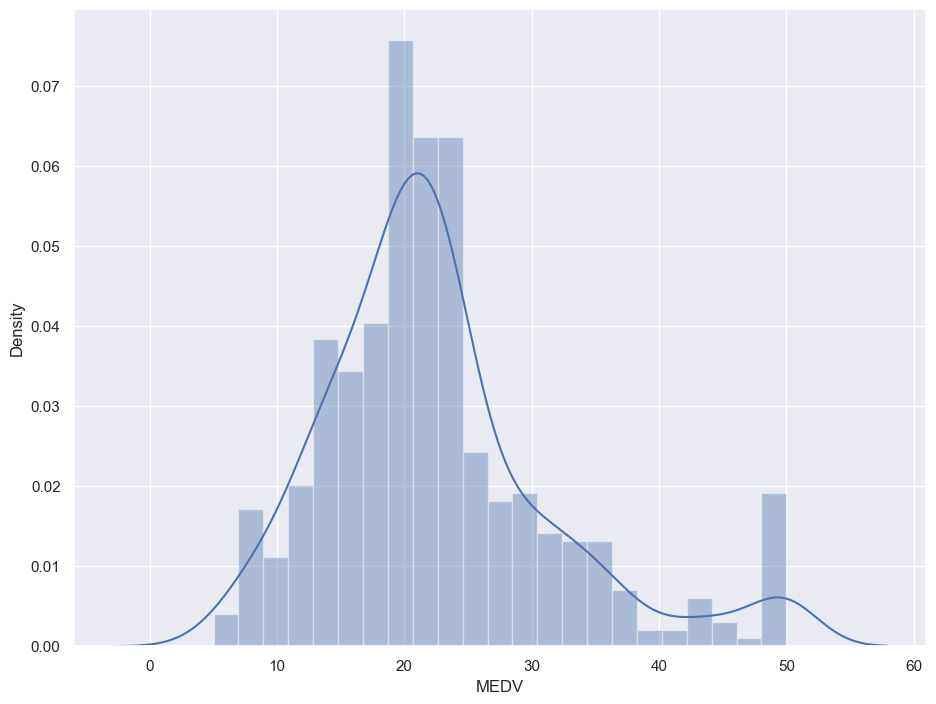

In [6]:
sns.set(rc={"figure.figsize":(11,8.27)})
sns.distplot(data["MEDV"])

In [7]:
correlation_matrix=data.corr().round(2)

<Axes: >

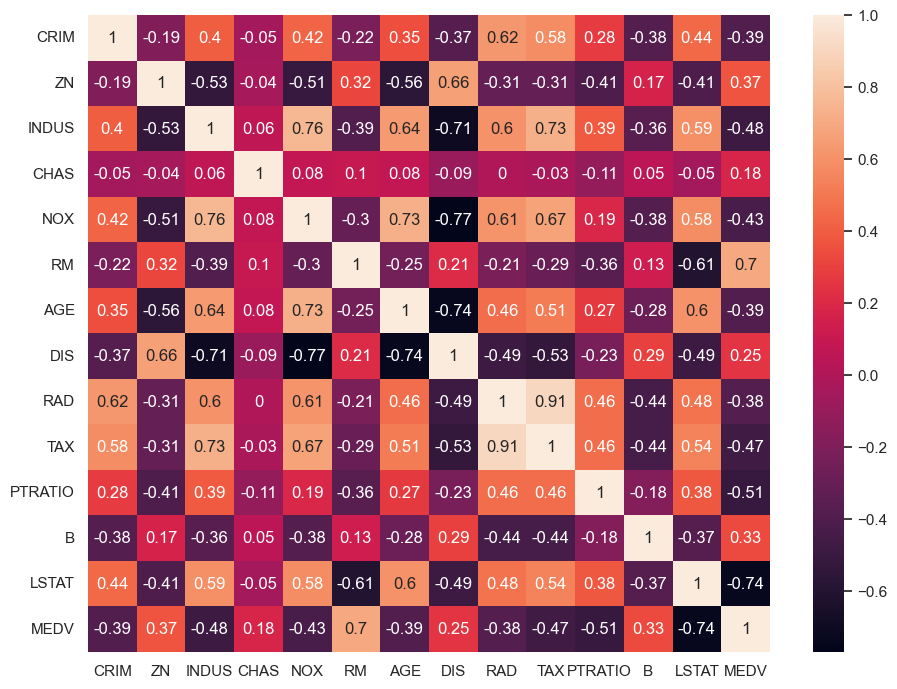

In [8]:
sns.heatmap(data=correlation_matrix,annot=True)

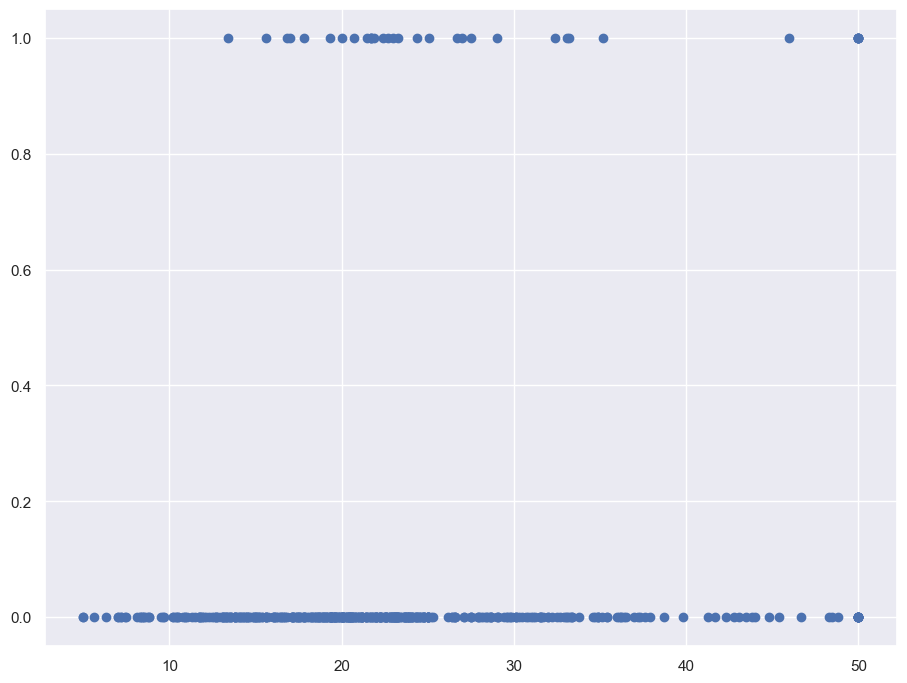

In [9]:
plt.scatter(data.MEDV,data.CHAS)


In [10]:
from sklearn.model_selection import train_test_split


Object `train_test_split` not found.


In [12]:
#General rule of thumb
# if dataset<10000 units <- then ideal split ratio is train,test,validation=70%,10%,20%
train,test=train_test_split(data,test_size=0.20,train_size=0.8)

In [13]:
train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
324,0.34109,0.0,7.38,0.0,0.493,6.415,40.1,4.7211,5,287,19.6,396.90,6.12,25.0
328,0.06617,0.0,3.24,0.0,0.460,5.868,25.8,5.2146,4,430,16.9,382.44,9.97,19.3
160,1.27346,0.0,19.58,1.0,0.605,6.250,92.6,1.7984,5,403,14.7,338.92,5.50,27.0
468,15.57570,0.0,18.10,0.0,0.580,5.926,71.0,2.9084,24,666,20.2,368.74,18.13,19.1
264,0.55007,20.0,3.97,0.0,0.647,7.206,91.6,1.9301,5,264,13.0,387.89,8.10,36.5


In [14]:
test.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
486,5.69175,0.0,18.10,0.0,0.583,6.114,79.8,3.5459,24,666,20.2,392.68,14.98,19.1
152,1.12658,0.0,19.58,NaN,0.871,5.012,88.0,1.6102,5,403,14.7,343.28,12.12,15.3
77,0.08707,0.0,12.83,0.0,0.437,6.140,45.8,4.0905,5,398,18.7,386.96,10.27,20.8
318,0.40202,0.0,9.90,0.0,0.544,6.382,67.2,3.5325,4,304,18.4,395.21,10.36,23.1
31,1.35472,0.0,8.14,0.0,0.538,6.072,100.0,4.1750,4,307,21.0,376.73,13.04,14.5


In [15]:
train=pd.read_csv("./titanic/train.csv")
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [16]:
train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<Axes: >

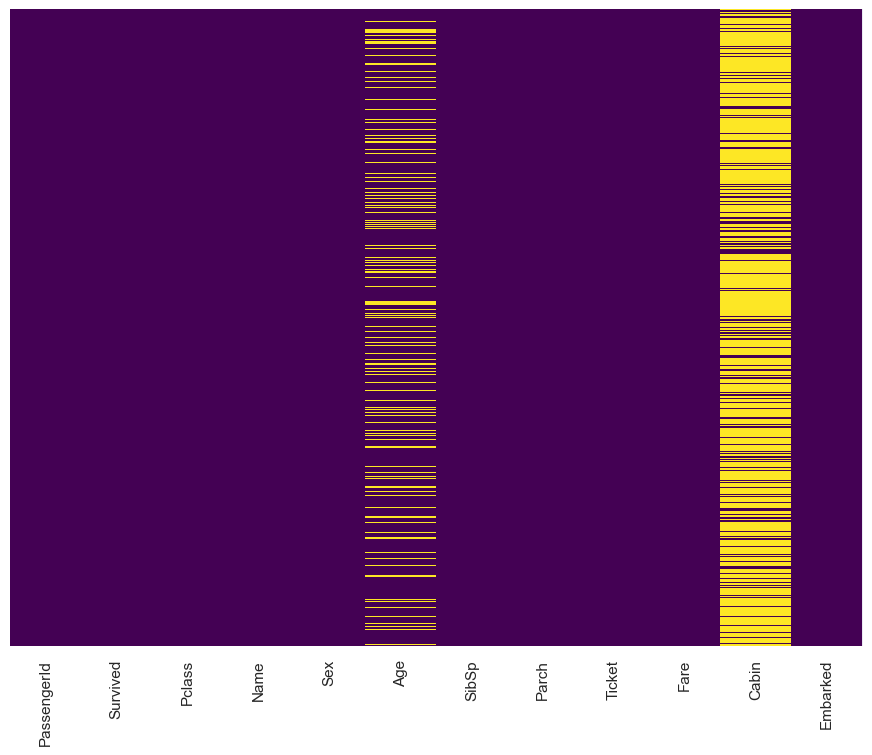

In [17]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap="viridis") # type: ignore

<Axes: xlabel='Survived', ylabel='count'>

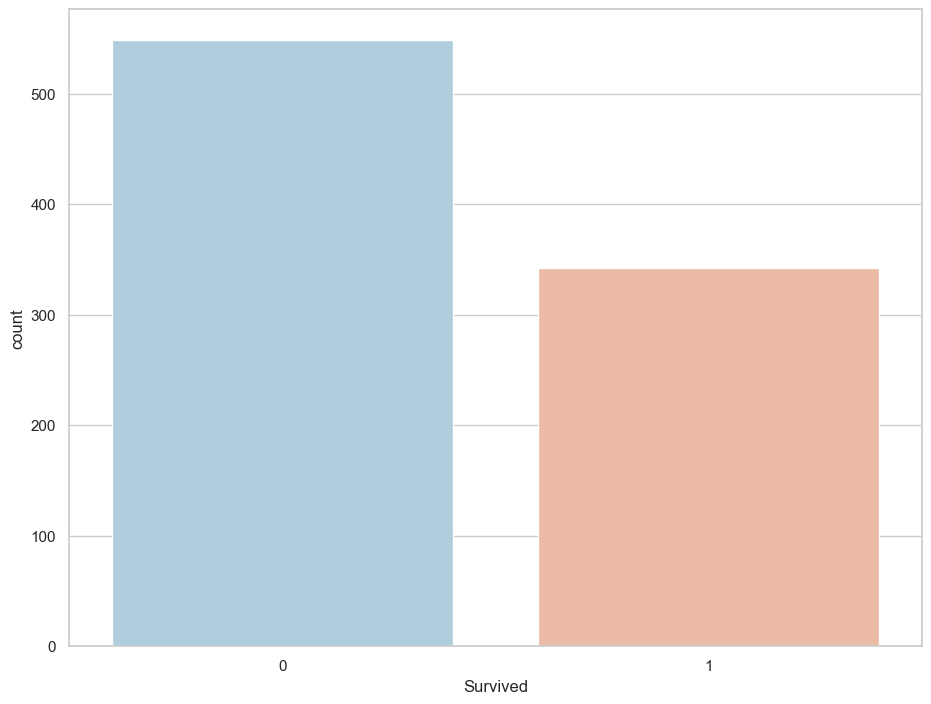

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r')

<Axes: xlabel='Survived', ylabel='count'>

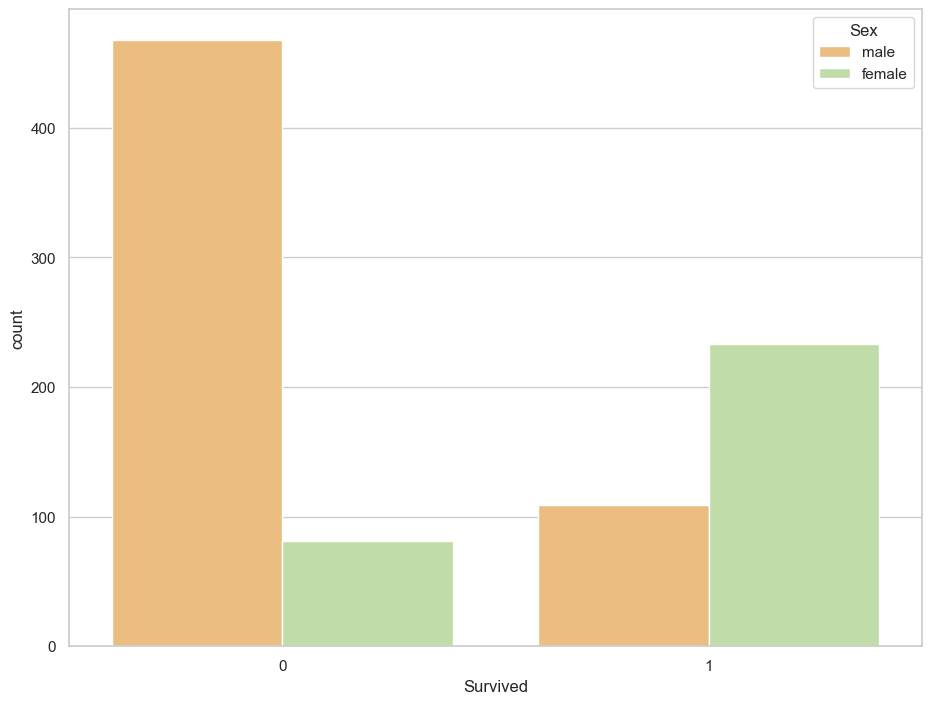

In [19]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train,palette = 'Spectral')

<Axes: xlabel='Survived', ylabel='count'>

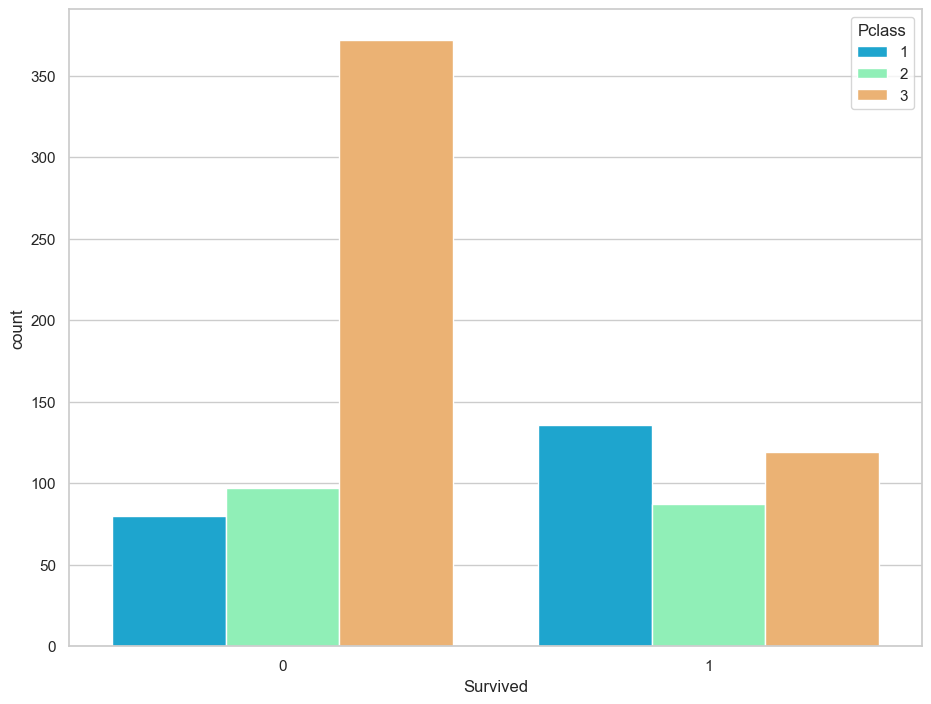

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

<Axes: xlabel='Survived', ylabel='count'>

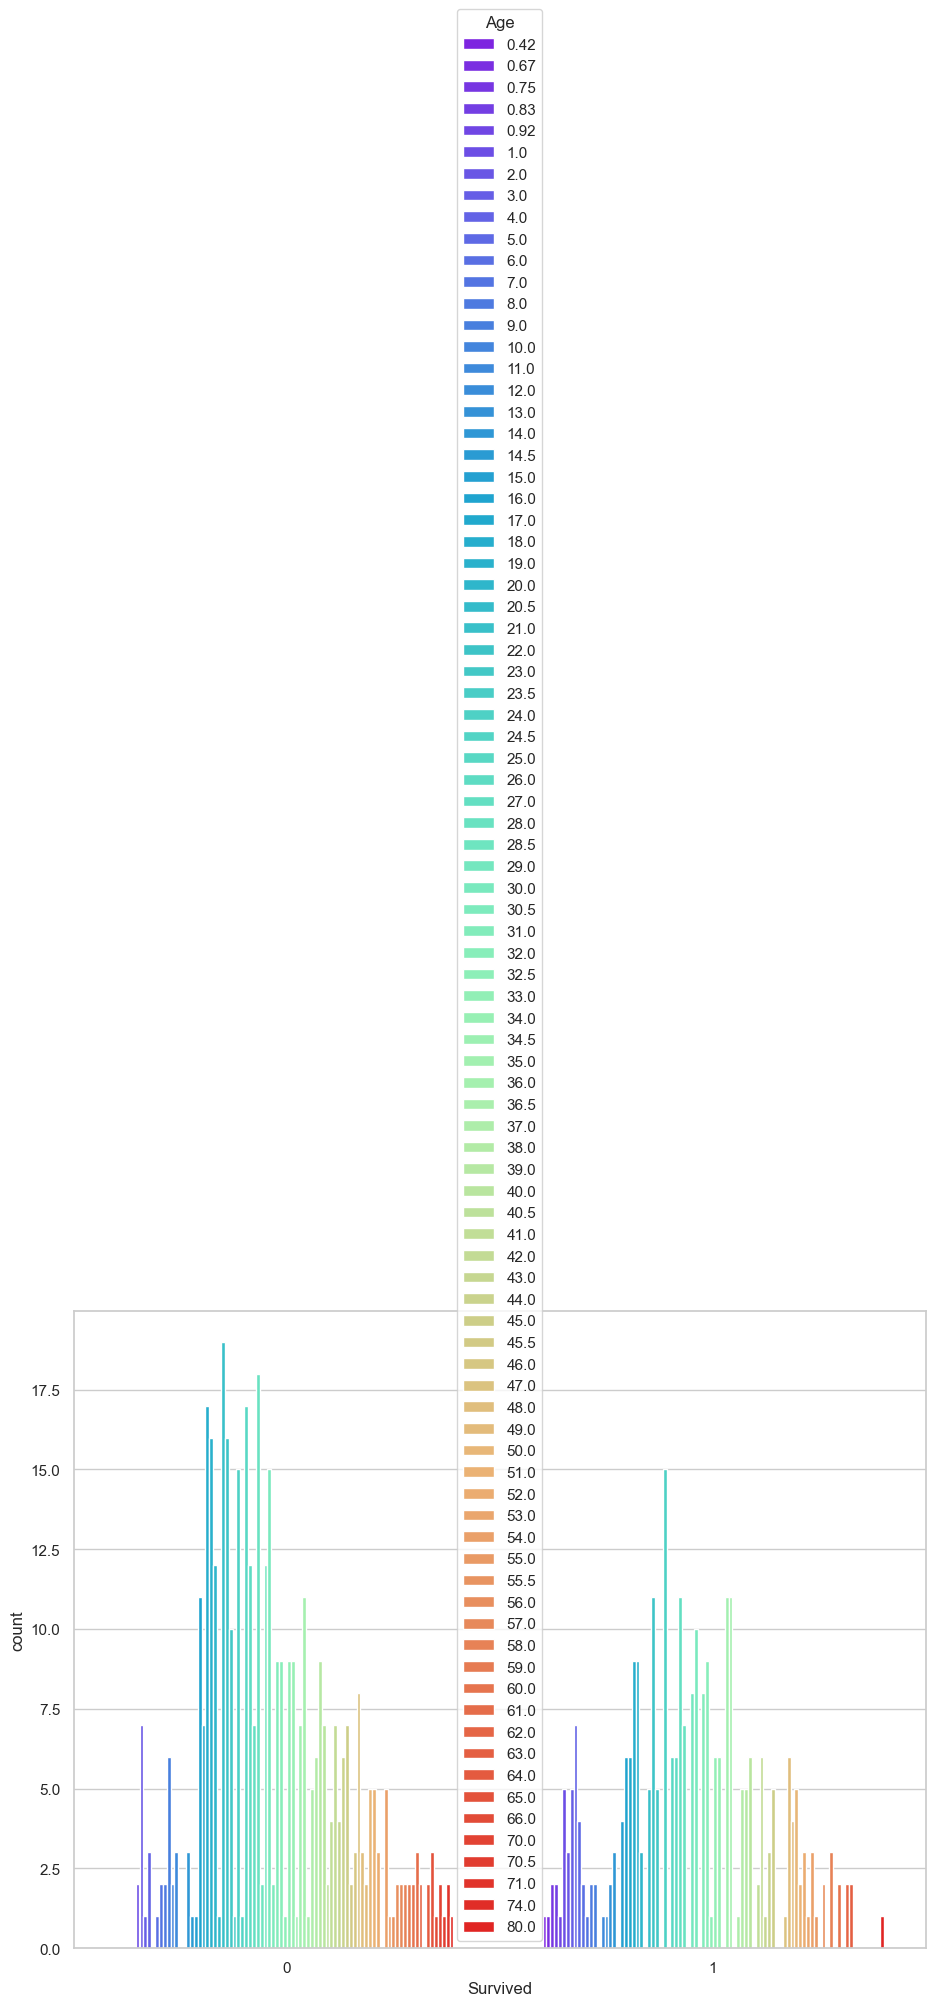

In [21]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Age',data=train,palette='rainbow')

Text(0, 0.5, 'Frequency')

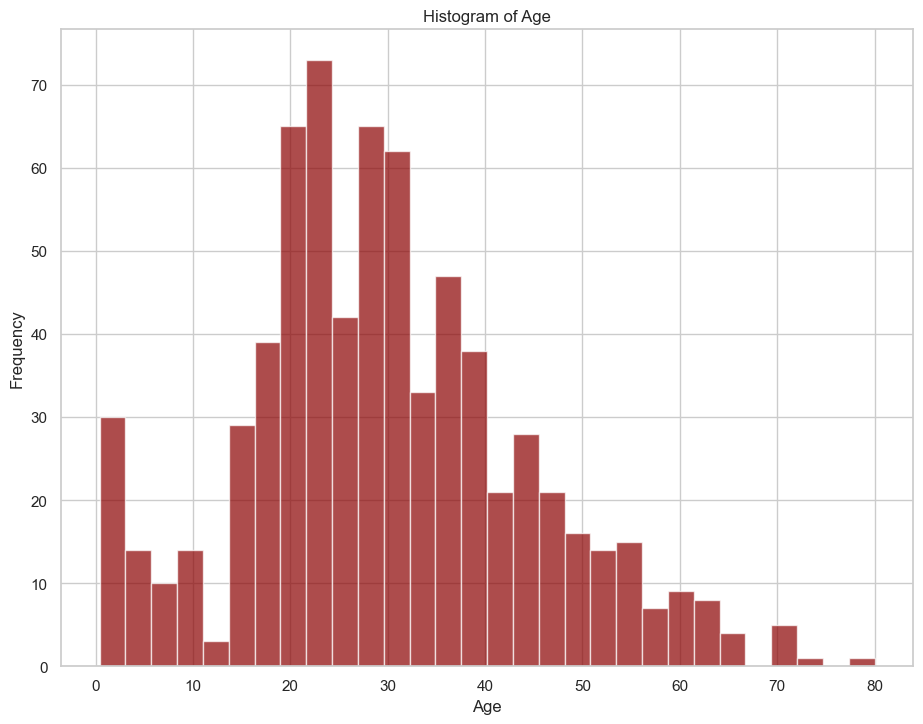

In [22]:
age_hist = train['Age'].hist(bins=30, color='darkred', alpha=0.7)
age_hist.set_title("Histogram of Age") # type: ignore
age_hist.set_xlabel("Age") # type: ignore
age_hist.set_ylabel("Frequency") # type: ignore

<Axes: xlabel='SibSp', ylabel='count'>

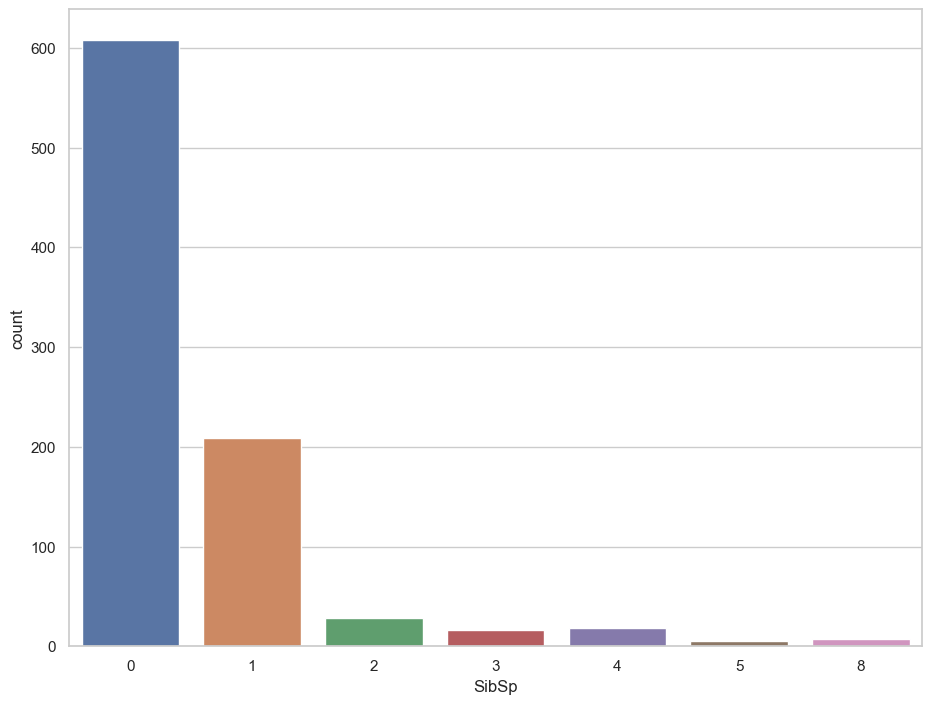

In [23]:
sns.countplot(x='SibSp',data=train)

<Axes: xlabel='Pclass', ylabel='Age'>

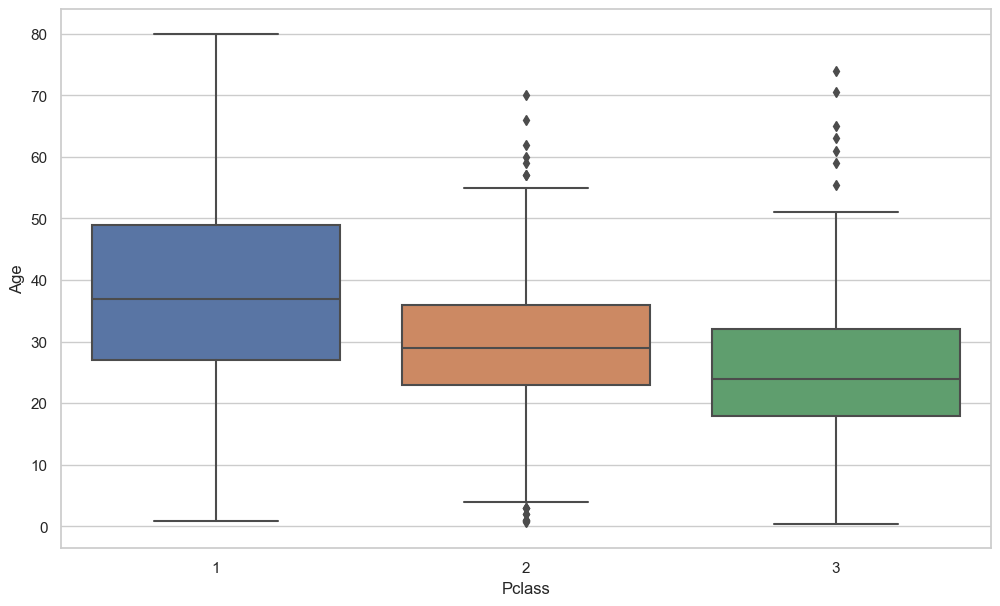

In [24]:
plt.figure(figsize=(12,7))
sns.boxplot(x="Pclass",y="Age",data=train)

In [25]:
train.groupby(['Pclass']).mean()

TypeError: Could not convert Cumings, Mrs. John Bradley (Florence Briggs Thayer)Futrelle, Mrs. Jacques Heath (Lily May Peel)McCarthy, Mr. Timothy JBonnell, Miss. ElizabethSloper, Mr. William ThompsonFortune, Mr. Charles AlexanderUruchurtu, Don. Manuel ESpencer, Mrs. William Augustus (Marie Eugenie)Meyer, Mr. Edgar JosephHolverson, Mr. Alexander OskarHarper, Mrs. Henry Sleeper (Myna Haxtun)Ostby, Mr. Engelhart CorneliusWoolner, Mr. HughIcard, Miss. AmelieHarris, Mr. Henry BirkhardtStewart, Mr. Albert ACarrau, Mr. Francisco MFortune, Miss. Mabel HelenChaffee, Mr. Herbert FullerGoldschmidt, Mr. George BGreenfield, Mr. William BertramWhite, Mr. Richard FrasarPorter, Mr. Walter ChamberlainBaxter, Mr. Quigg EdmondWhite, Mr. Percival WaylandNewsom, Miss. Helen MonypenyFutrelle, Mr. Jacques HeathGiglio, Mr. VictorPears, Mrs. Thomas (Edith Wearne)Williams, Mr. Charles DuaneChibnall, Mrs. (Edith Martha Bowerman)Baumann, Mr. John DVan der hoef, Mr. WyckoffSmith, Mr. James ClinchIsham, Miss. Ann ElizabethRood, Mr. Hugh RoscoeRomaine, Mr. Charles Hallace ("Mr C Rolmane")Brown, Mrs. James Joseph (Margaret Tobin)Lurette, Miss. EliseBlank, Mr. HenryNewell, Miss. MadeleineBazzani, Miss. AlbinaHoyt, Mr. Frederick MaxfieldHarris, Mrs. Henry Birkhardt (Irene Wallach)Minahan, Dr. William EdwardBeckwith, Mr. Richard LeonardStead, Mr. William ThomasThorne, Mrs. Gertrude MaybelleCherry, Miss. GladysWard, Miss. AnnaTaussig, Mr. EmilHarrison, Mr. WilliamGraham, Mrs. William Thompson (Edith Junkins)Bissette, Miss. AmeliaCairns, Mr. AlexanderNatsch, Mr. Charles HAndrews, Miss. Kornelia TheodosiaSmith, Mr. Richard WilliamBarber, Miss. Ellen "Nellie"Bishop, Mrs. Dickinson H (Helen Walton)Lewy, Mr. Ervin GAllison, Miss. Helen LoraineSaalfeld, Mr. AdolpheBaxter, Mrs. James (Helene DeLaudeniere Chaput)Allison, Master. Hudson TrevorFleming, Miss. MargaretPenasco y Castellana, Mrs. Victor de Satode (Maria Josefa Perez de Soto y Vallejo)Francatelli, Miss. Laura MabelHays, Miss. Margaret BechsteinRyerson, Miss. Emily BorieWick, Miss. Mary NatalieSpedden, Mrs. Frederic Oakley (Margaretta Corning Stone)Young, Miss. Marie GriceHippach, Miss. Jean GertrudePartner, Mr. AustenGraham, Mr. George EdwardFrauenthal, Mrs. Henry William (Clara Heinsheimer)Pears, Mr. Thomas ClintonBurns, Miss. Elizabeth MargaretBlackwell, Mr. Stephen WeartFortune, Miss. Alice ElizabethWilliams-Lambert, Mr. Fletcher FellowsBowerman, Miss. Elsie EdithWarren, Mrs. Frank Manley (Anna Sophia Atkinson)Aubart, Mme. Leontine PaulineHarder, Mr. George AchillesRinghini, Mr. SanteMeyer, Mrs. Edgar Joseph (Leila Saks)Widener, Mr. Harry ElkinsBidois, Miss. RosalieHolverson, Mrs. Alexander Oskar (Mary Aline Towner)Carter, Mr. William ErnestNewell, Miss. MarjorieMinahan, Miss. Daisy EBjornstrom-Steffansson, Mr. Mauritz HakanSilvey, Mr. William BairdCarter, Miss. Lucile PolkFortune, Mr. MarkDodge, Master. WashingtonSeward, Mr. Frederic KimberPeuchen, Major. Arthur GodfreyForeman, Mr. Benjamin LaventallGoldenberg, Mr. Samuel LMillet, Mr. Francis DavisKenyon, Mrs. Frederick R (Marion)Anderson, Mr. HarryGee, Mr. Arthur HSmart, Mr. John MontgomeryClifford, Mr. George QuincyBishop, Mr. Dickinson HHoyt, Mrs. Frederick Maxfield (Jane Anne Forby)Kent, Mr. Edward AustinMolson, Mr. Harry MarklandArtagaveytia, Mr. RamonEustis, Miss. Elizabeth MusseyAllison, Mrs. Hudson J C (Bessie Waldo Daniels)Maioni, Miss. RobertaPenasco y Castellana, Mr. Victor de SatodeBradley, Mr. George ("George Arthur Brayton")McGough, Mr. James RobertRothschild, Mrs. Martin (Elizabeth L. Barrett)Walker, Mr. William AndersonPerreault, Miss. AnneHippach, Mrs. Louis Albert (Ida Sophia Fischer)Farthing, Mr. JohnButt, Major. Archibald WillinghamLeRoy, Miss. BerthaFrolicher, Miss. Hedwig MargarithaCrosby, Miss. Harriet RDouglas, Mr. Walter DonaldNicholson, Mr. Arthur ErnestThayer, Mr. John Borland JrWright, Mr. GeorgeDuff Gordon, Lady. (Lucille Christiana Sutherland) ("Mrs Morgan")Robbins, Mr. VictorTaussig, Mrs. Emil (Tillie Mandelbaum)Appleton, Mrs. Edward Dale (Charlotte Lamson)Flynn, Mr. John Irwin ("Irving")Silvey, Mrs. William Baird (Alice Munger)Thayer, Mrs. John Borland (Marian Longstreth Morris)Ross, Mr. John HugoTaussig, Miss. RuthFrolicher-Stehli, Mr. MaxmillianStephenson, Mrs. Walter Bertram (Martha Eustis)Duff Gordon, Sir. Cosmo Edmund ("Mr Morgan")Harrington, Mr. Charles HHomer, Mr. Harry ("Mr E Haven")Daniel, Mr. Robert WilliamsShutes, Miss. Elizabeth WKimball, Mr. Edwin Nelson JrSutton, Mr. FrederickLongley, Miss. Gretchen FiskeBarkworth, Mr. Algernon Henry WilsonStahelin-Maeglin, Dr. MaxParr, Mr. William Henry MarshSagesser, Mlle. EmmaHarper, Mr. Henry SleeperSimonius-Blumer, Col. Oberst AlfonsNewell, Mr. Arthur WebsterFrauenthal, Dr. Henry WilliamColley, Mr. Edward PomeroyTaylor, Mrs. Elmer Zebley (Juliet Cummins Wright)Davidson, Mr. ThorntonCardeza, Mr. Thomas Drake MartinezHassab, Mr. HammadMadill, Miss. Georgette AlexandraDick, Mr. Albert AdrianWeir, Col. JohnThayer, Mr. John BorlandAstor, Mrs. John Jacob (Madeleine Talmadge Force)Silverthorne, Mr. Spencer VictorCalderhead, Mr. Edward PenningtonCleaver, Miss. AliceMayne, Mlle. Berthe Antonine ("Mrs de Villiers")Klaber, Mr. HermanTaylor, Mr. Elmer ZebleyEndres, Miss. Caroline LouiseChambers, Mr. Norman CampbellAllen, Miss. Elisabeth WaltonLesurer, Mr. Gustave JHawksford, Mr. Walter JamesCavendish, Mr. Tyrell WilliamRyerson, Miss. Susan Parker "Suzette"Crosby, Capt. Edward GiffordMarvin, Mr. Daniel WarnerRothes, the Countess. of (Lucy Noel Martha Dyer-Edwards)Carter, Mrs. William Ernest (Lucile Polk)Hogeboom, Mrs. John C (Anna Andrews)Brewe, Dr. Arthur JacksonRobert, Mrs. Edward Scott (Elisabeth Walton McMillan)Dick, Mrs. Albert Adrian (Vera Gillespie)Long, Mr. Milton ClydeGuggenheim, Mr. BenjaminHoyt, Mr. William FisherLeader, Dr. Alice (Farnham)Carter, Master. William Thornton IIAndrews, Mr. Thomas JrChambers, Mrs. Norman Campbell (Bertha Griggs)Fry, Mr. RichardHays, Mrs. Charles Melville (Clara Jennings Gregg)Reuchlin, Jonkheer. John GeorgeStone, Mrs. George Nelson (Martha Evelyn)Compton, Miss. Sara RebeccaMarechal, Mr. PierreSerepeca, Miss. AugustaGoldenberg, Mrs. Samuel L (Edwiga Grabowska)Lines, Miss. Mary ConoverWick, Mrs. George Dennick (Mary Hitchcock)Daly, Mr. Peter Denis Swift, Mrs. Frederick Joel (Margaret Welles Barron)Roebling, Mr. Washington Augustus IIBeckwith, Mrs. Richard Leonard (Sallie Monypeny)Carlsson, Mr. Frans OlofPotter, Mrs. Thomas Jr (Lily Alexenia Wilson)Graham, Miss. Margaret EdithBehr, Mr. Karl Howell to numeric

In [ ]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37

        elif Pclass == 2:
            return 29

        else:
            return 24

    else:

        return Age
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)
train.dropna(inplace=True)

<Axes: >

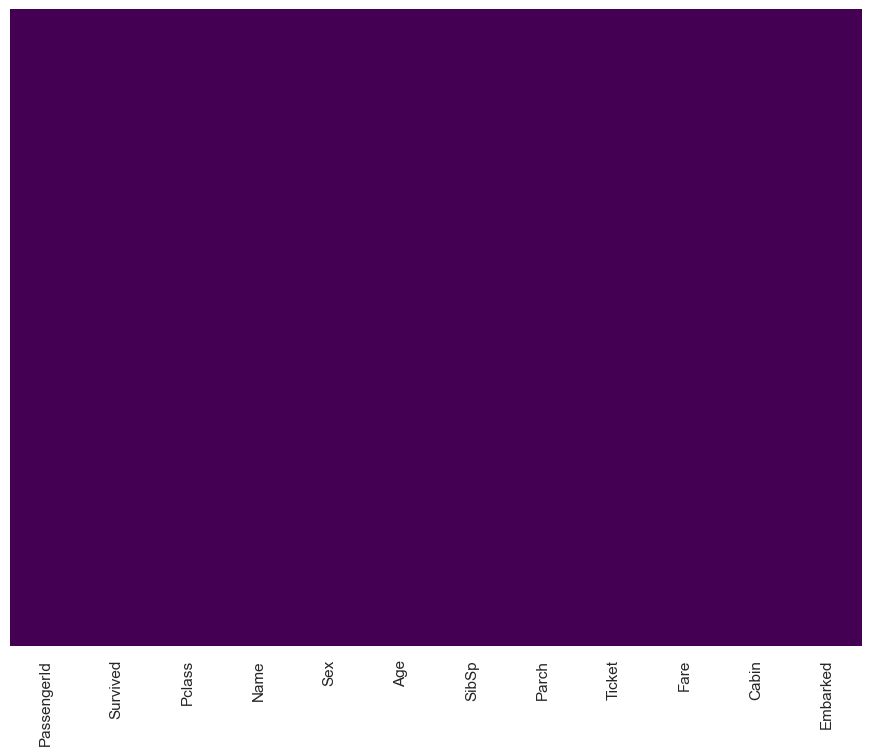

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis') # type: ignore

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
sex = pd.get_dummies(train['Sex'],drop_first=True)
sex

,male
1,False
3,False
6,True
10,False
11,False
...,...
871,False
872,True
879,False
887,False


In [ ]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)
embark

,Q,S
1,False,False
3,False,True
6,False,True
10,False,True
11,False,True
...,...,...
871,False,True
872,False,True
879,False,False
887,False,True


In [ ]:
train = pd.concat([train,sex,embark],axis=1)
train.drop(['Sex','Embarked','Name','Ticket'],axis=1,inplace=True)

In [ ]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Cabin,male,Q,S
1,2,1,1,38.0,1,0,71.2833,C85,False,False,False
3,4,1,1,35.0,1,0,53.1000,C123,False,False,True
6,7,0,1,54.0,0,0,51.8625,E46,True,False,True
10,11,1,3,4.0,1,1,16.7000,G6,False,False,True
11,12,1,1,58.0,0,0,26.5500,C103,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,D35,False,False,True
872,873,0,1,33.0,0,0,5.0000,B51 B53 B55,True,False,True
879,880,1,1,56.0,0,1,83.1583,C50,False,False,False
887,888,1,1,19.0,0,0,30.0000,B42,False,False,True


In [ ]:
train.drop(['Cabin'],axis=1,inplace=True)

In [ ]:
train

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
1,2,1,1,38.0,1,0,71.2833,False,False,False
3,4,1,1,35.0,1,0,53.1000,False,False,True
6,7,0,1,54.0,0,0,51.8625,True,False,True
10,11,1,3,4.0,1,1,16.7000,False,False,True
11,12,1,1,58.0,0,0,26.5500,False,False,True
...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,47.0,1,1,52.5542,False,False,True
872,873,0,1,33.0,0,0,5.0000,True,False,True
879,880,1,1,56.0,0,1,83.1583,False,False,False
887,888,1,1,19.0,0,0,30.0000,False,False,True


In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
X = pd.DataFrame(np.c_[data['LSTAT'], data['RM']], columns =
['LSTAT','RM'])
Y =data['TAX']
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,
random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score
lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)
# model evaluation for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)
print("The model performance for training set")
print("--------------------------------------")
print('RMSE is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values